<a href="https://colab.research.google.com/github/kameliaz/KAMELIA-MIDTERM/blob/main/Kamelia_Midterm_MV_SEM1_2324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)

<span style="color:blue">
    answer: <font color='blue'>The shape of the output is 5x5x12
</span>

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [ ] Individual feature map
 - [X] Instance in the mini-batch
 - [X] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [X] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [X] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

<span style="color:blue">
    answer: <font color='blue'>There are 122 learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [X] Deep neural networks usually require a big amount of data to be properly trained.
- [X] They can be fooled by adversarial/ noisy examples.
- [X] They are difficult to interpret and understand.
- [X] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [ ] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

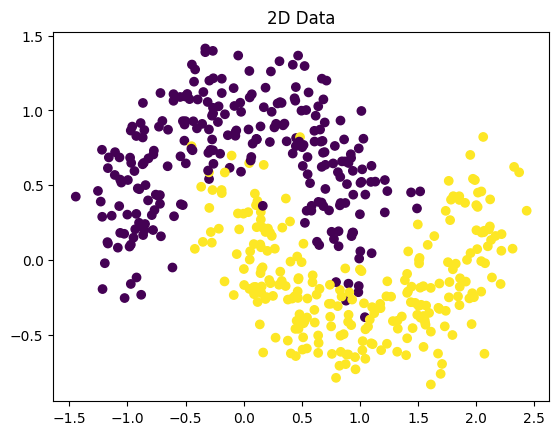

In [ ]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer: <font color='blue'> YES, this data be correctly separable using the classifier. 'Linear' classifier may not suitable for non-linear data, however, 'Sigmoid' activation is suitable for non-linear data.
</span>

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

# DEFINE OUR MODEL
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,10)
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten()

  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.maxpool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu(x)
    out = self.fc2(x)

    return out

#Full code on github

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>YES. Because the training data size being too small and does not contain enough data samples to accurately represent all possible input data values</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Normalization (2) Dropout</font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

# DEFINE OUR MODEL
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,10)
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten()
    self.batchnorm1 = nn.BatchNorm2d(6)
    self.batchnorm2 = nn.BatchNorm2d(16)
    self.dropout = nn.Dropout(0.4)

  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.batchnorm1(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.batchnorm2(x)
    x = self.maxpool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.relu(x)
    out = self.fc2(x)

    return out

#Full code on github



c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

model_pretrained = models.densenet121(pretrained = True)

#Full code on github

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    <font color='blue'> No, the accuracy decrease. This is due to pretrained models are typically trained on datasets that may not perfectly match the characteristics of the specific task or dataset. Besides, could be the training data is not large enough or diverse enough, as the model may not have enough information to learn the underlying patterns in the data.
    However, in some cases, the accuracy shows an improvement because a pretrained model is already built and trained with these weights. Hence, using a high-quality pretrained model with a large number of accurate representative weights leads to higher chances of success for dataset training. </span>

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.